# Hands-on K-Fold Cross-validation
- File: pima-indians-diabetes.csv

In [3]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

filename = 'diabetes.csv'

dataframe = read_csv(filename)

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.50, random_state=1)

num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold, scoring='roc_auc')
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.80952381 0.74358974 0.96875    0.96666667 0.98412698 0.58333333
 0.92727273 0.85454545 0.73015873 0.71428571 0.93333333 0.69230769
 0.76363636 0.93333333 0.65454545 0.93333333 0.94871795 0.9375
 0.66       0.83333333 0.82       0.75925926 0.92592593 0.86
 0.92       0.79545455 0.92307692 0.93181818 0.85185185 0.85714286
 0.51785714 0.76785714 0.90740741 0.91666667 0.77777778 0.91071429
 0.96296296 1.         0.85714286 1.         0.65384615 1.
 0.75       1.         0.53846154 0.875      0.73214286 0.92
 0.72       0.78571429]
Accuracy: 83.621% (12.342%)


# Hands-on LOOCV

In [4]:
# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import LeaveOneOut
# data sample
data = array([10,20,30,40,50,60,70,80,90,100])
# prepare cross validation
loocv = LeaveOneOut()
# enumerate splits
for train, test in loocv.split(data):
	print('train: %s, test: %s' % (data[train], data[test]))

train: [ 20  30  40  50  60  70  80  90 100], test: [10]
train: [ 10  30  40  50  60  70  80  90 100], test: [20]
train: [ 10  20  40  50  60  70  80  90 100], test: [30]
train: [ 10  20  30  50  60  70  80  90 100], test: [40]
train: [ 10  20  30  40  60  70  80  90 100], test: [50]
train: [ 10  20  30  40  50  70  80  90 100], test: [60]
train: [ 10  20  30  40  50  60  80  90 100], test: [70]
train: [ 10  20  30  40  50  60  70  90 100], test: [80]
train: [ 10  20  30  40  50  60  70  80 100], test: [90]
train: [10 20 30 40 50 60 70 80 90], test: [100]


# Linear Regression auto_mpg residual
- File: car-mpg.csv

In [42]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

# reading the CSV file into pandas dataframe
mpg_df = pd.read_csv("car-mpg.csv") 

In [43]:
# Check top few records to get a feel of the data structure
mpg_df.head(50)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,0,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,0,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,0,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,0,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,0,amc ambassador dpl


In [44]:
# drop the car name column as it is useless for the model
mpg_df = mpg_df.drop('car_name', axis=1)
mpg_df

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1
394,44.0,4,97.0,52,2130,24.6,82,2,1
395,32.0,4,135.0,84,2295,11.6,82,1,1
396,28.0,4,120.0,79,2625,18.6,82,1,1


In [45]:
# Replace the numbers in categorical variables with the actual country names in the origin col
mpg_df['origin'] = mpg_df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
mpg_df

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,america,0
1,15.0,8,350.0,165,3693,11.5,70,america,0
2,18.0,8,318.0,150,3436,11.0,70,america,0
3,16.0,8,304.0,150,3433,12.0,70,america,0
4,17.0,8,302.0,140,3449,10.5,70,america,0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,america,1
394,44.0,4,97.0,52,2130,24.6,82,europe,1
395,32.0,4,135.0,84,2295,11.6,82,america,1
396,28.0,4,120.0,79,2625,18.6,82,america,1


In [46]:
# Convert categorical variable into dummy/indicator variables. As many columns will be created as distinct values
# This is also kown as one hot coding. The column names will be America, Europe and Asia... with one hot coding
mpg_df = pd.get_dummies(mpg_df, columns=['origin'])
mpg_df

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,1,0,0,1
395,32.0,4,135.0,84,2295,11.6,82,1,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,1,0,0


In [47]:
#Lets analysze the distribution of the dependent (mpg) column
mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0
origin_america,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
origin_asia,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0
origin_europe,398.0,0.175879,0.381197,0.0,0.000,0.0,0.000,1.0


In [48]:
mpg_df.dtypes

mpg               float64
cyl                 int64
disp              float64
hp                 object
wt                  int64
acc               float64
yr                  int64
car_type            int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [50]:
#Check if the hp column contains anything other than digits 
# run the "isdigit() check on 'hp' column of the mpg_df dataframe. Result will be True or False for every row
# capture the result in temp dataframe and dow a frequency count using value_counts()
# There are six records with non digit values in 'hp' column

temp = pd.DataFrame(mpg_df.hp.str.isdigit())  # if the string is made of digits store True else False  in the hp column 
# in temp dataframe

temp[temp['hp'] == False]   # from temp take only those rows where hp has false

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [51]:
# On inspecting records number 32, 126 etc, we find "?" in the columns. Replace them with "nan"
#Replace them with nan and remove the records from the data frame that have "nan"
mpg_df = mpg_df.replace('?', np.nan)

In [52]:
#Let us see if we can get those records with nan

mpg_df[mpg_df.isnull().any(axis=1)]

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,0,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,1,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,1,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,1,0,0


In [53]:
#instead of dropping the rows, lets replace the missing values with median value. 
mpg_df.median()

mpg                 23.0
cyl                  4.0
disp               148.5
hp                  93.5
wt                2803.5
acc                 15.5
yr                  76.0
car_type             1.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [54]:
# replace the missing values in 'hp' with median value of 'hp' :Note, we do not need to specify the column names
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
#mpg_df = mpg_df.fillna(mpg_df.median())

mpg_df = mpg_df.apply(lambda x: x.fillna(x.median()),axis=0)

In [55]:
mpg_df.dtypes

mpg               float64
cyl                 int64
disp              float64
hp                 object
wt                  int64
acc               float64
yr                  int64
car_type            int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [56]:
mpg_df['hp'] = mpg_df['hp'].astype('float64')

In [57]:
mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0
origin_america,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
origin_asia,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0


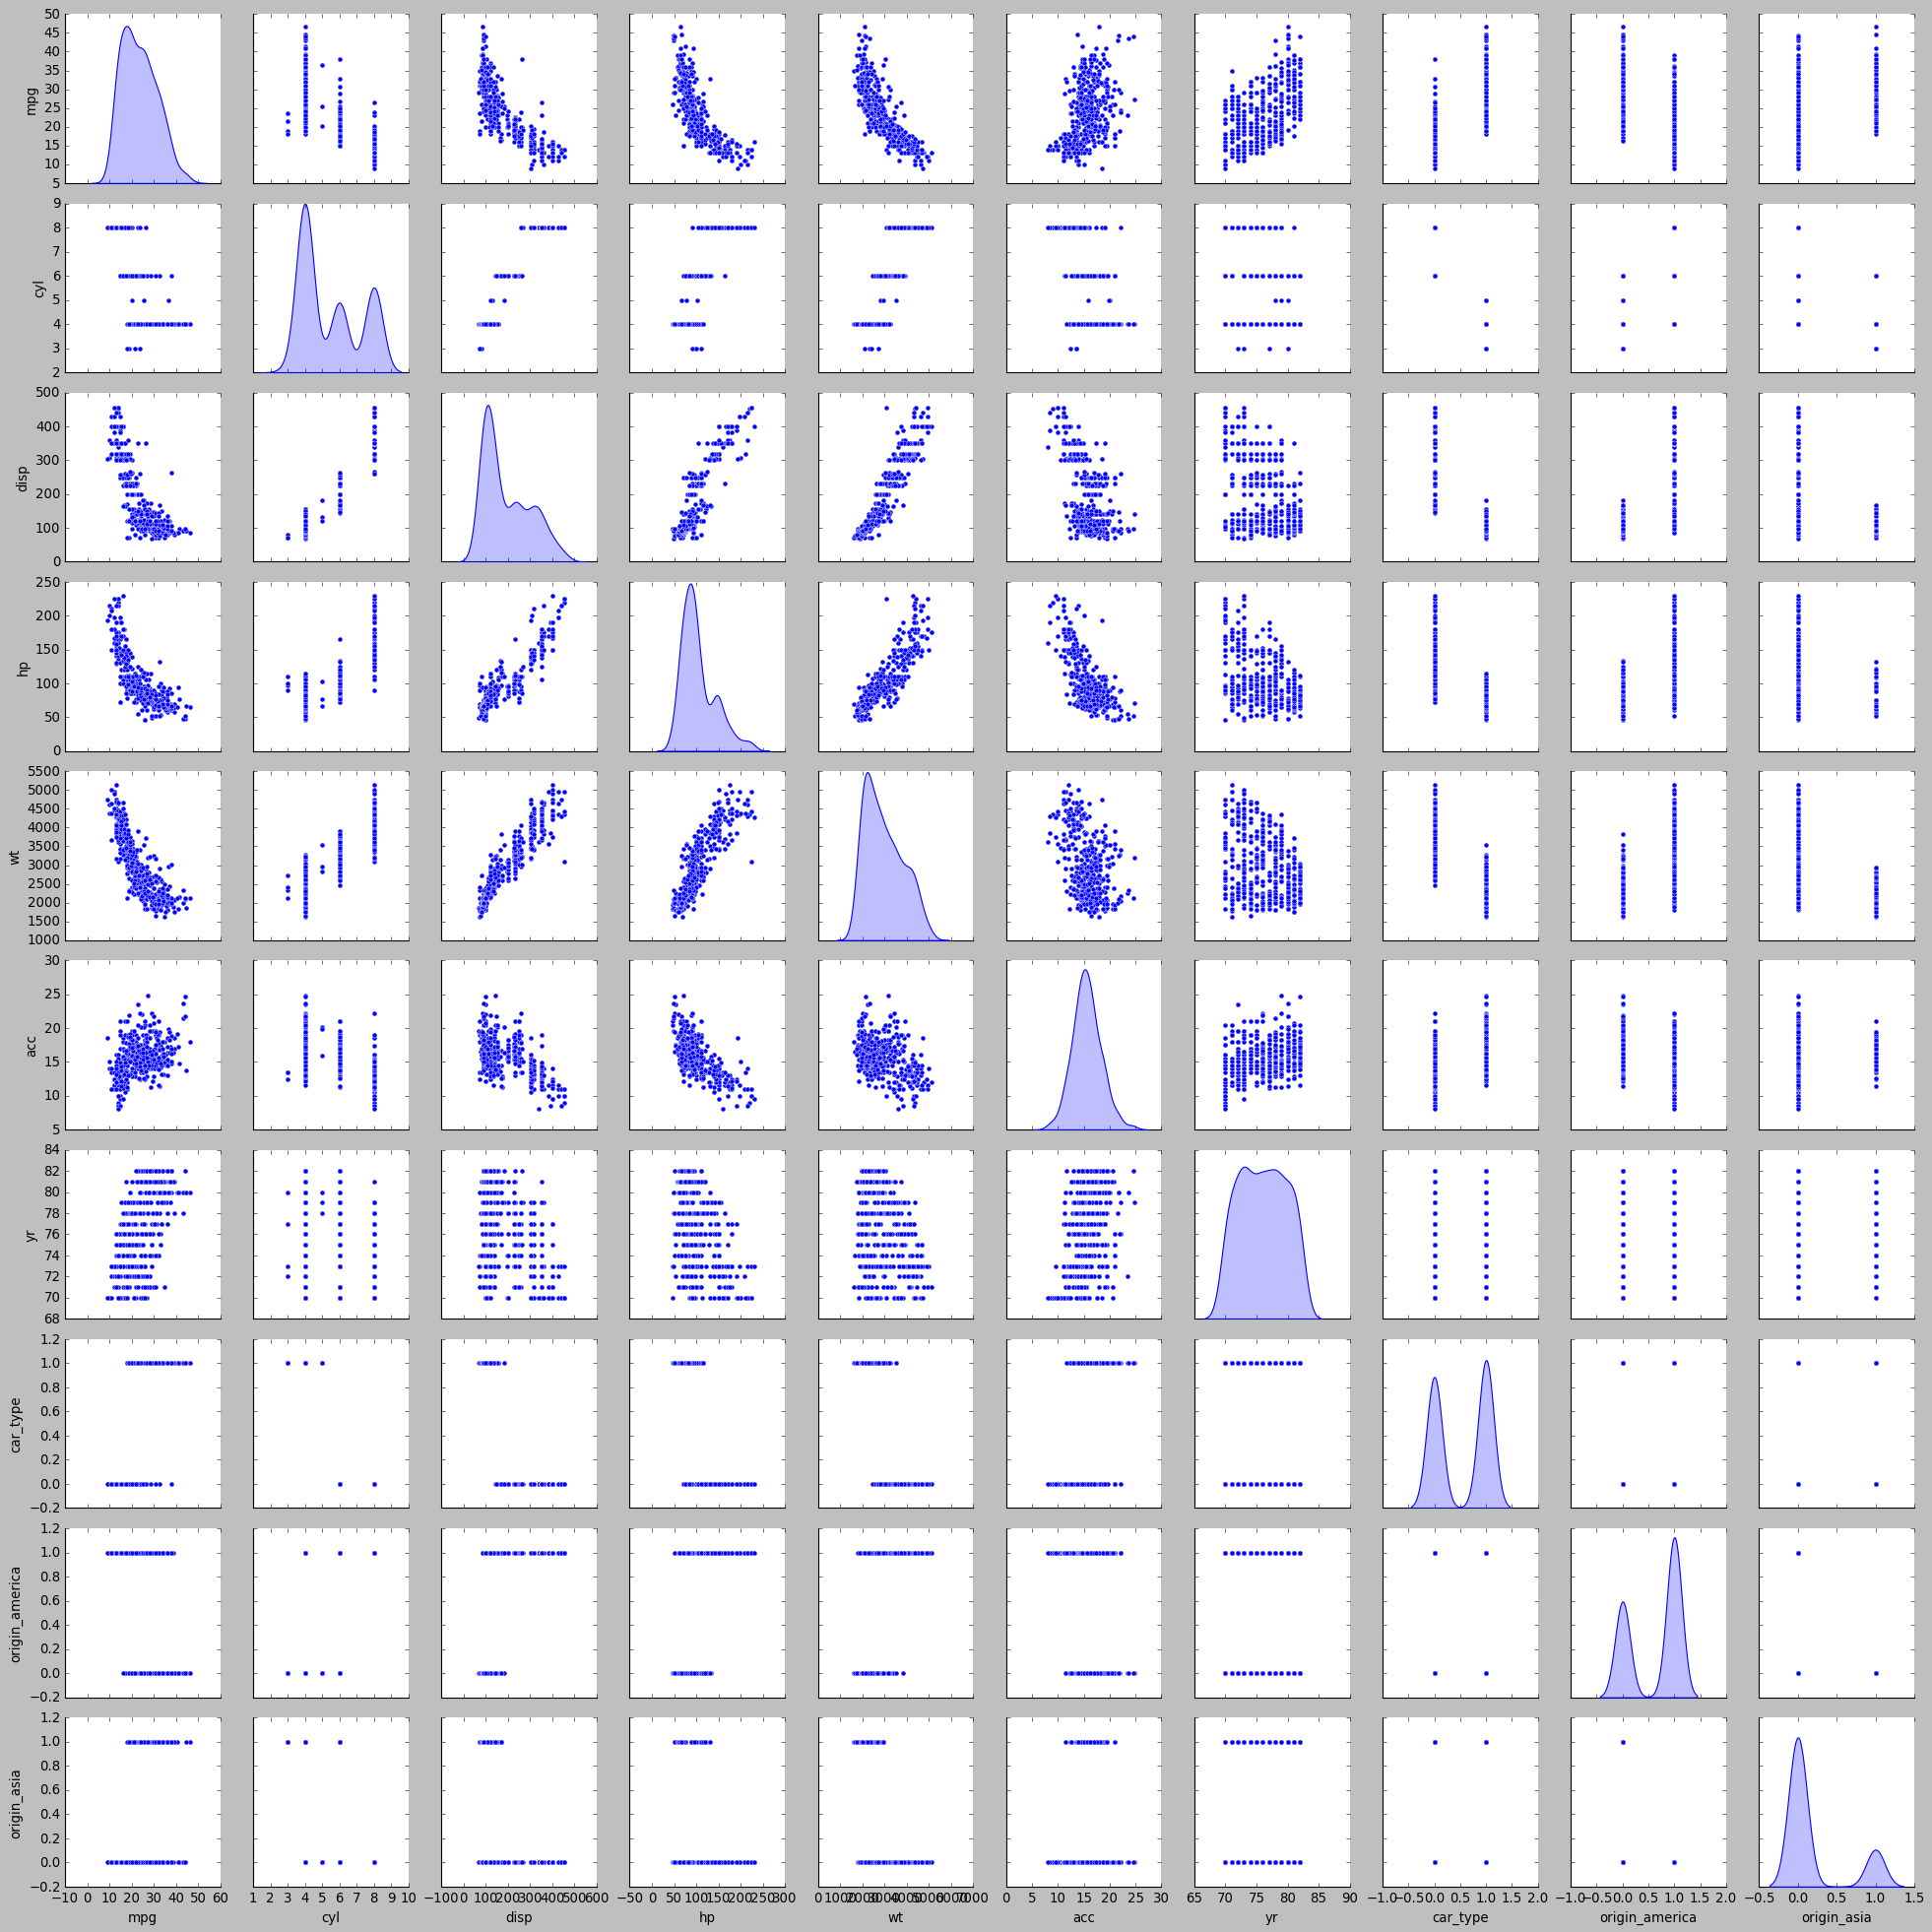

In [58]:
# Let us do a correlation analysis among the different dimensions and also each dimension with the dependent dimension
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view 

mpg_df_attr = mpg_df.iloc[:, 0:10]

#axes = pd.plotting.scatter_matrix(mpg_df_attr)
#plt.tight_layout()
#plt.savefig('d:\greatlakes\mpg_pairpanel.png')

sns.pairplot(mpg_df_attr, diag_kind='kde') 

In [59]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = mpg_df.drop('mpg', axis=1)
X = X.drop(['origin_america', 'origin_asia' ,'origin_europe'], axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = mpg_df[['mpg']]

In [60]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The coefficient for cyl is 1.8637178336269915
The coefficient for disp is 0.010066050755003096
The coefficient for hp is -0.039229006295897
The coefficient for wt is -0.006414996525192754
The coefficient for acc is 0.01172380948866745
The coefficient for yr is 0.758818484975937
The coefficient for car_type is 6.626521339249256
The intercept for our model is -26.69336012583212


In [61]:
regression_model.score(X_train, y_train)

0.8258091181337589

In [62]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_test, y_test)

0.8404952015294235

<AxesSubplot:xlabel='acc', ylabel='mpg'>

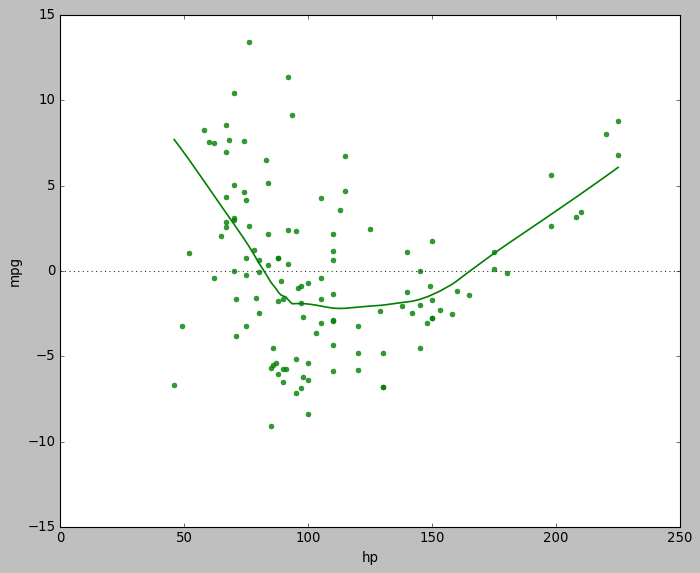

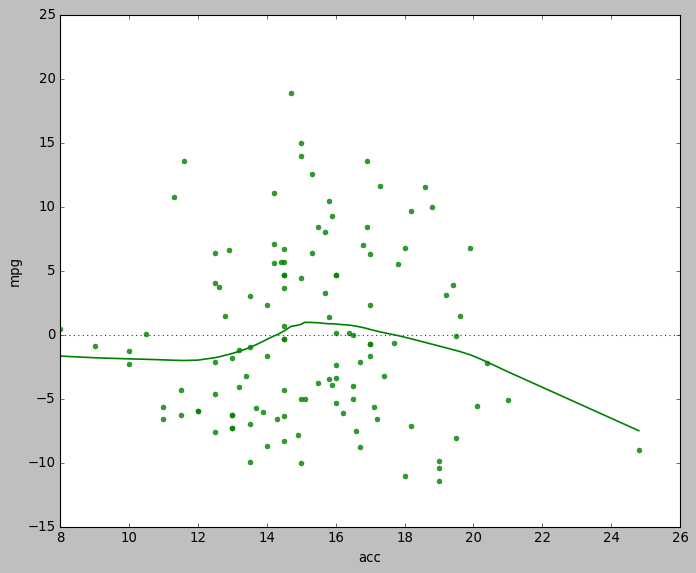

In [64]:
# Is OLS a good model ? Should we building a simple linear model ? Check the residuals for each predictor.

fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['hp'], y= y_test['mpg'], color='green', lowess=True )


fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['acc'], y= y_test['mpg'], color='green', lowess=True )

In [65]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single dataframe

data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,cyl,disp,hp,wt,acc,yr,car_type,mpg
350,4,105.0,63.0,2215,14.9,81,1,34.7
59,4,97.0,54.0,2254,23.5,72,1,23.0
120,4,121.0,112.0,2868,15.5,73,1,19.0
12,8,400.0,150.0,3761,9.5,70,0,15.0
349,4,91.0,68.0,1985,16.0,81,1,34.1


In [66]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'mpg ~ cyl+disp+hp+wt+acc+yr+car_type', data = data_train).fit()
lm1.params

Intercept   -26.693360
cyl           1.863718
disp          0.010066
hp           -0.039229
wt           -0.006415
acc           0.011724
yr            0.758818
car_type      6.626521
dtype: float64

In [67]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     182.9
Date:                Sun, 06 Jun 2021   Prob (F-statistic):           1.41e-98
Time:                        23:53:55   Log-Likelihood:                -725.17
No. Observations:                 278   AIC:                             1466.
Df Residuals:                     270   BIC:                             1495.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.6934      5.597     -4.769      0.0

In [68]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [69]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

3.0538103653849595

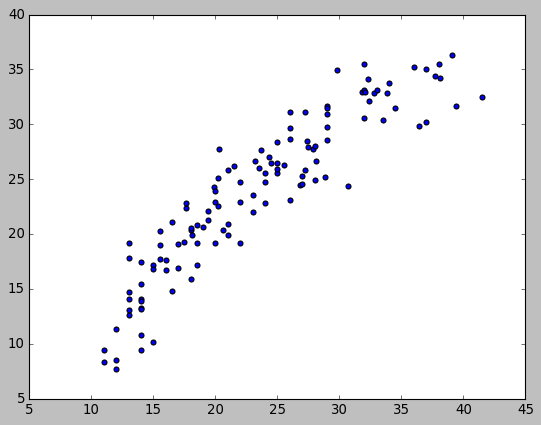

In [70]:
# so there is avg of 3.0 (roundoff) mpg difference from real mpg on an avg
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500



plt.scatter(y_test['mpg'], y_pred)

In [71]:
# ------------------------------------------------- ITERATION 2  ---------------------------------------------------
# How do we improve the model? the R^2 is .844, how do we improve it
# The indpendent attributes have different units and scales of measurement 
# It is always a good practice to scale all the dimensions using z scores or someother methode to address the problem of different scales 
from scipy.stats import zscore

mpg_df_scaled  = mpg_df.apply(zscore)

In [72]:
#convert the numpy array back into a dataframe 

mpg_df_scaled = pd.DataFrame(mpg_df_scaled, columns=mpg_df.columns)

In [73]:
#browse the contents of the dataframe. Check that all the values are now z scores

mpg_df_scaled

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
...,...,...,...,...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983,0.941412,0.773559,-0.497643,-0.461968
394,2.624265,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,1.621983,0.941412,-1.292726,-0.497643,2.164651
395,1.087017,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,1.621983,0.941412,0.773559,-0.497643,-0.461968
396,0.574601,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,1.621983,0.941412,0.773559,-0.497643,-0.461968


In [74]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = mpg_df_scaled.drop('mpg', axis=1)
X = X.drop({'origin_america', 'origin_asia' ,'origin_europe'}, axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = mpg_df_scaled[['mpg']]

In [75]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 0.40560367304154177
The coefficient for disp is 0.1342870509041047
The coefficient for hp is -0.1918421956382495
The coefficient for wt is -0.6950483549628031
The coefficient for acc is 0.004136474479631505
The coefficient for yr is 0.3589858088084143
The coefficient for car_type is 0.42366946398475763


In [76]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.016865932919211797


In [77]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.8404952015294236

In [78]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.3912052446554161

In [79]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

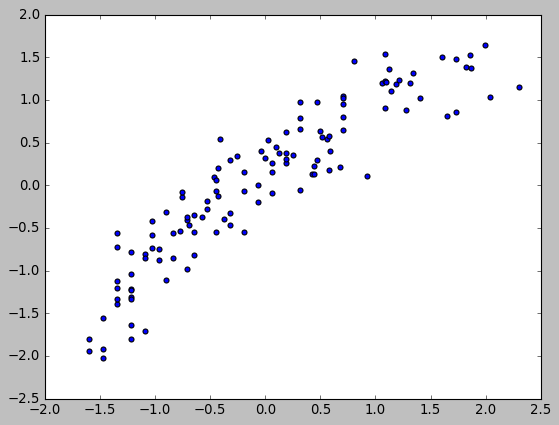

In [80]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test['mpg'], y_pred)

In [83]:
# !pip install imblearn

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np


# calculate accuracy measures and confusion matrix
from sklearn import metrics


from sklearn.metrics import recall_score

from imblearn.over_sampling import SMOTE

In [84]:
# Since it is a data file with no header, we will supply the column names which have been obtained from the above URL 
# Create a python list of column names called "names"

#Load the file from local directory using pd.read_csv which is a special form of read_table
#while reading the data, supply the "colnames" list

pima_df = pd.read_csv("diabetes.csv")

In [85]:
pima_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [86]:
# Let us check whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of 
# a number.

# we use np.isreal a numpy function which checks each column for each row and returns a bool array, 
# where True if input element is real.
# applymap is pandas dataframe function that applies the np.isreal function columnwise
# Following line selects those rows which have some non-numeric value in any of the columns hence the  ~ symbol

pima_df[~pima_df.applymap(np.isreal).all(1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [87]:
#Lets analysze the distribution of the various attributes
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [89]:
# Let us look at the target column which is 'class' to understand how the data is distributed amongst the various values
pima_df.groupby(["Outcome"]).count()

# Most are not diabetic. The ratio is almost 1:2 in favor or class 0.  The model's ability to predict class 0 will 
# be better than predicting class 1.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [90]:
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


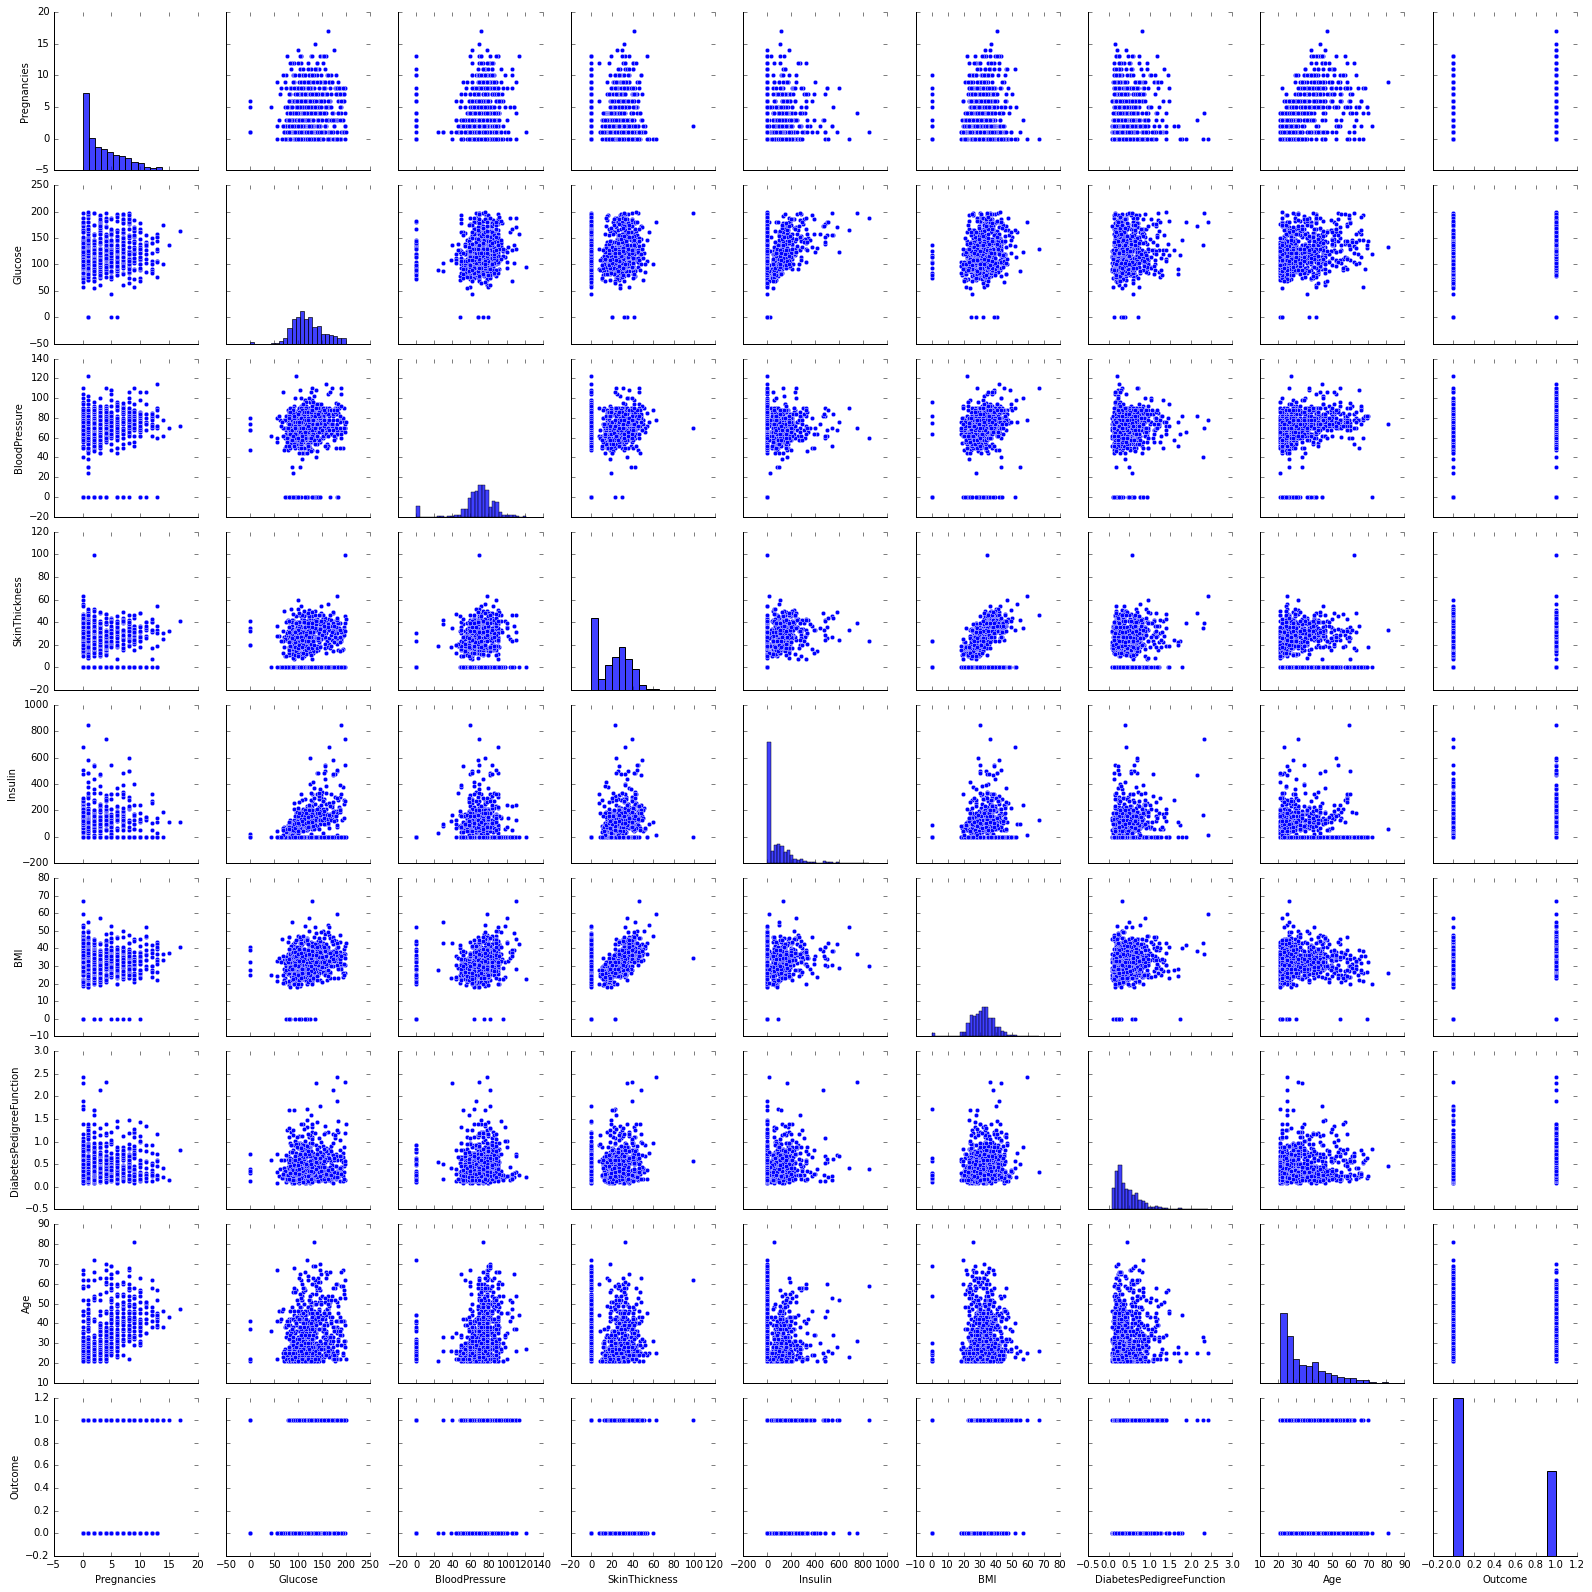

In [91]:
# Pairplot using sns

sns.pairplot(pima_df)

# data for all the attributes are skewed, especially for the variable "test"

## The mean for test is 80(rounded) while the median is 30.5 which clearly indicates an extreme long tail on the right

## Attributes which look normally distributed (plas, pres, skin, and mass).
## Some of the attributes look like they may have an exponential distribution (preg, test, pedi, age).
## Age should probably have a normal distribution, the constraints on the data collection may have skewed the distribution.

## There is no obvious relationship between age and onset of diabetes.
## There is no obvious relationship between pedi function and onset of diabetes.

In [97]:
array = pima_df.values
X = array[:,0:8] # select all rows and first 8 columns which are the attributes
Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

numpy.ndarray

In [99]:
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))



print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

Before UpSampling, counts of label '1': 184
Before UpSampling, counts of label '0': 353 

After UpSampling, counts of label '1': 353
After UpSampling, counts of label '0': 353 

After UpSampling, the shape of train_X: (706, 8)
After UpSampling, the shape of train_y: (706,) 



In [101]:
# Fit the model on original data i.e. before upsampling
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)

0.7489177489177489


In [102]:
test_pred = model.predict(X_test)

print(metrics.classification_report(y_test, test_pred))
print(metrics.confusion_matrix(y_test, test_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.86      0.81       147
         1.0       0.70      0.55      0.61        84

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.71       231
weighted avg       0.74      0.75      0.74       231

[[127  20]
 [ 38  46]]


In [103]:
# fit model on upsampled data 

model.fit(X_train_res, y_train_res)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.7445887445887446
[[107  40]
 [ 19  65]]
              precision    recall  f1-score   support

         0.0       0.85      0.73      0.78       147
         1.0       0.62      0.77      0.69        84

    accuracy                           0.74       231
   macro avg       0.73      0.75      0.74       231
weighted avg       0.77      0.74      0.75       231



# Down Sampling the larger class

In [105]:
non_diab_indices = pima_df[pima_df['Outcome'] == 0].index   # Get the record numbers of non-diab cases
no_diab = len(pima_df[pima_df['Outcome'] == 0])             # how many non-diab cases
print(no_diab)

diab_indices = pima_df[pima_df['Outcome'] == 1].index       # record number of the diabeteics cases
diab = len(pima_df[pima_df['Outcome'] == 1])                # how many diabetic cases
print(diab)

#Randomly pick up 200 non-diab indices
random_indices = np.random.choice( non_diab_indices, no_diab - 200 , replace=False)

# combine the 200 non-diab indices with diab indices
down_sample_indices = np.concatenate([diab_indices,random_indices])

500
268


In [106]:
# Extract all those records for diab and non-diab to create new set
pima_df_down_sample = pima_df.loc[down_sample_indices] 
pima_df_down_sample.shape

(568, 9)

In [108]:
# look at the class distribution after downsample
pima_df_down_sample.groupby(["Outcome"]).count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,300,300,300,300,300,300,300,300
1,268,268,268,268,268,268,268,268


In [109]:
array = pima_df_down_sample.values
X = array[:,0:8] # select all rows and first 8 columns which are the attributes
Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

numpy.ndarray

In [110]:
print('After DownSampling, the shape of X_train: {}'.format(X_train.shape))
print('After DownSampling, the shape of X_test: {} \n'.format(X_test.shape))

After DownSampling, the shape of X_train: (397, 8)
After DownSampling, the shape of X_test: (171, 8) 



In [111]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.7485380116959064
[[74 24]
 [19 54]]
              precision    recall  f1-score   support

         0.0       0.80      0.76      0.77        98
         1.0       0.69      0.74      0.72        73

    accuracy                           0.75       171
   macro avg       0.74      0.75      0.75       171
weighted avg       0.75      0.75      0.75       171



# IMBLearn Random Under Sampling

In [112]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)
y_rus

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [113]:
y_rus.shape

(390,)

# IMBLearn Random Over Sampling

In [114]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [115]:
y_ros

array([0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0.

In [116]:
y_ros.shape

(404,)

In [117]:
X_ros.shape

(404, 8)

In [119]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
# id_tl is removed instances of majority class
X_tl, y_tl = tl.fit_resample(X_train, y_train)

In [120]:
y_tl.shape

(358,)

In [121]:
X_tl.shape

(358, 8)

# Upsampling followed by downsampling

In [122]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(sampling_strategy='auto')
X_smt, y_smt = smt.fit_resample(X_train, y_train)
X_smt.shape

(332, 8)

# Cluster based undersampling

In [123]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids()  
X_cc, y_cc = cc.fit_resample(X_train, y_train)
X_cc.shape

(390, 8)

In [124]:
y_cc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

# HandsOn Ridge&Lasso

In [125]:
%matplotlib inline


# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns
mpg_df = pd.read_csv("car-mpg.csv")  
mpg_df = mpg_df.drop('car_name', axis=1)
mpg_df['origin'] = mpg_df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
mpg_df = pd.get_dummies(mpg_df, columns=['origin'])
mpg_df = mpg_df.replace('?', np.nan)
mpg_df = mpg_df.apply(lambda x: x.fillna(x.median()),axis=0)

In [126]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = mpg_df.drop('mpg', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = mpg_df[['mpg']]

In [127]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# scale all the columns of the mpg_df. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns) 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=1)

In [128]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 2.5059518049385052
The coefficient for disp is 2.535708286056052
The coefficient for hp is -1.7889335736325254
The coefficient for wt is -5.551819873098726
The coefficient for acc is 0.11485734803440907
The coefficient for yr is 2.931846548211611
The coefficient for car_type is 2.977869737601943
The coefficient for origin_america is -0.5832955290165979
The coefficient for origin_asia is 0.3474931380432245
The coefficient for origin_europe is 0.37741646808688323


In [129]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 23.665107741982705


In [130]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 2.47057467  2.44494419 -1.78573889 -5.47285499  0.10115618  2.92319984
   2.94492098 -0.57949986  0.34667456  0.37344909]]


In [131]:
lasso = Lasso(alpha=0.2)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.          0.         -0.3475456  -4.01181473  0.          2.64248634
  1.07111166 -0.54724128  0.          0.        ]


# Let us compare their scores

In [132]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.8343770256960538
0.8513421387780066


In [133]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8343617931312616
0.8518882171608505


In [134]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.8114389394513553
0.8547810865027448


# More or less similar results but with less complex models.

## Complexity is a function of variables and coefficients
### Note - with Lasso, we get equally good result in test though not so in training.  Further, the number of dimensions is much less in LASSO model than ridge or un-regularized modelv

# Let us generate polynomial models reflecting the non-linear interaction between some dimensions

In [135]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, interaction_only=True)
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(278, 56)

## Fit a simple non regularized linear model on poly features

In [136]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])

[ 3.24082770e-13 -1.14204220e+12 -4.43738735e+00 -2.24947964e+00
 -2.98166341e+00 -1.56730367e+00  3.00442772e+00 -1.52060575e+12
 -7.80788356e+11  3.71375223e+12 -3.23609457e+12 -1.15918732e+00
 -1.43925476e+00 -3.57818604e-03  2.58444214e+00 -1.91918182e+00
 -3.65891647e+12 -6.45319147e+12 -2.39436996e+12 -2.28543203e+12
  3.90441895e-01  2.09503174e-01 -4.23446655e-01  3.58471680e+00
 -2.02703094e+00 -9.03672940e+11 -7.44778888e+11 -7.10893285e+11
  2.47772217e-01 -6.70440674e-01 -1.92620850e+00 -7.47558594e-01
 -2.15947171e+11 -1.77976884e+11 -1.69879374e+11 -1.72500610e-01
  5.30212402e-01 -3.32050323e+00  1.69388998e+12  1.39605098e+12
  1.33253411e+12  5.85876465e-01  1.53894043e+00  4.76389633e+11
  3.92625390e+11  3.74761903e+11  4.00207520e-01 -1.27131857e+10
 -1.04778089e+10 -1.00010944e+10 -1.09798815e+12  8.13175594e+11
  7.76178109e+11  2.20248210e+11 -5.15971535e+12  2.83957085e+12]


In [137]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.          3.73512981 -2.93500874 -2.13974194 -3.56547812 -1.28898893
   3.01290805  2.04739082  0.0786974   0.21972225 -0.3302341  -1.46231096
  -1.17221896  0.00856067  2.48054694 -1.67596093  0.99537516 -2.29024279
   4.7699338  -2.08598898  0.34009408  0.35024058 -0.41761834  3.06970569
  -2.21649433  1.86339518 -2.62934278  0.38596397  0.12088534 -0.53440382
  -1.88265835 -0.7675926  -0.90146842  0.52416091  0.59678246 -0.26349448
   0.5827378  -3.02842915 -0.36548074  0.5956112  -0.15941014  0.49168856
   1.45652375 -0.43819158 -0.20964198  0.77665496  0.36489921 -0.4750838
   0.3551047   0.23188557 -1.42941282  2.06831543 -0.34986402 -0.32320394
   0.39054656  0.06283411]]


In [138]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.9143225702003365
0.8613398053698541


In [139]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.         -0.         -0.         -1.59613165 -5.22452383 -0.
  2.86907439  0.03030592 -0.10514919  0.          0.         -0.
 -0.          0.          0.28971732 -0.          0.         -0.
  0.11457443 -0.          0.          1.15720495  0.          0.
 -0.          0.          0.         -0.          0.04724906  0.
 -0.6925298  -0.          0.          0.         -0.         -0.
 -0.         -0.67082659  0.         -0.         -0.          0.16918498
 -0.         -0.61771612  0.          0.36046427  0.         -0.37086554
  0.          0.         -0.         -0.          0.18165859 -0.
 -0.         -0.        ]


In [140]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.8900519684208551
0.8802228448476971
